In [ ]:
#1. LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paso 2: Importar pandas
import pandas as pd

# Paso 3: Ruta al archivo con el nombre correcto (ajustado con (4))
dataset_path = "/content/drive/MyDrive/Colab Notebooks/amazon.csv"

# Paso 4: Leer el archivo
df = pd.read_csv(dataset_path)

Mounted at /content/drive


# **Visualización de las primeras y ultimas filas**

Visualización de los datos con la estructura original del DataFrame (filas y columnas), lo que permite desplazarse de manera fluida mediante barras de scroll horizontales y verticales.

In [ ]:
# Mostrar las primeras filas
df.head ()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **LIMPIEZA DE DATOS**

# **1º Eliminación de celdas y valores nulos sin alterar DataFrame**

In [ ]:
#Se elimina celdas / filas con valores nulos
df.dropna(inplace=True)

#Se valida si el nuevo df contiene celdas nulas
df.isnull().values.any()

np.False_

# **2º Validación de que no existan valores duplicados**

In [ ]:
df.duplicated().sum()

np.int64(0)

# **3º Limpieza y preparación de los datos**
Se observa que algunas columnas deberían ser numéricas, pero están cargadas como texto (object):

discounted_price actual_price rating rating_count Contienen símbolos (₹, %, comas, etc.), para poder analizarlas correctamente, será necesario limpiar dichos caracteres y luego convertir las columnas al tipo adecuado (int o float).

In [ ]:
# Limpieza Columnas con Símbolos

def clean_numeric_column(df, column, currency=False, percent=False, extract_digits=False):
    col = df[column]

    # Si ya es numérico, lo dejamos como está
    if pd.api.types.is_numeric_dtype(col):
        return col

    # Convertimos a string para limpieza
    col = col.astype(str).str.strip()

    if currency:
        col = col.str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

    if percent:
        col = col.str.replace('%', '', regex=False)

    if extract_digits:
        # Extrae solo la parte numérica (útil para rating_count con texto)
        col = col.str.extract(r'(\d[\d,]*)')[0]
        col = col.str.replace(',', '', regex=False)

    return pd.to_numeric(col, errors='coerce')

# Aplicar limpieza
df['discounted_price'] = clean_numeric_column(df, 'discounted_price', currency=True)
df['actual_price'] = clean_numeric_column(df, 'actual_price', currency=True)
df['discount_percentage'] = clean_numeric_column(df, 'discount_percentage', percent=True)
df['rating'] = clean_numeric_column(df, 'rating')
df['rating_count'] = clean_numeric_column(df, 'rating_count', extract_digits=True)

# Validación de limpieza
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **4° Limpieza de outliers**
Aquí te muestro cómo identificar y eliminar outliers utilizando el método del Rango Intercuartílico (IQR). Este método es útil para columnas numéricas como rating_count y rating.

El IQR se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los outliers se definen típicamente como valores que caen por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.

Número de filas antes de eliminar outliers en 'discounted_price': 1463
Número de filas después de eliminar outliers en 'discounted_price': 1246
Número de filas antes de eliminar outliers en 'actual_price': 1246
Número de filas después de eliminar outliers en 'actual_price': 1143
Número de filas antes de eliminar outliers en 'discount_percentage': 1143
Número de filas después de eliminar outliers en 'discount_percentage': 1143
Número de filas antes de eliminar outliers en 'rating_count': 1143
Número de filas después de eliminar outliers en 'rating_count': 1017
Número de filas antes de eliminar outliers en 'rating': 1017
Número de filas después de eliminar outliers en 'rating': 999


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...


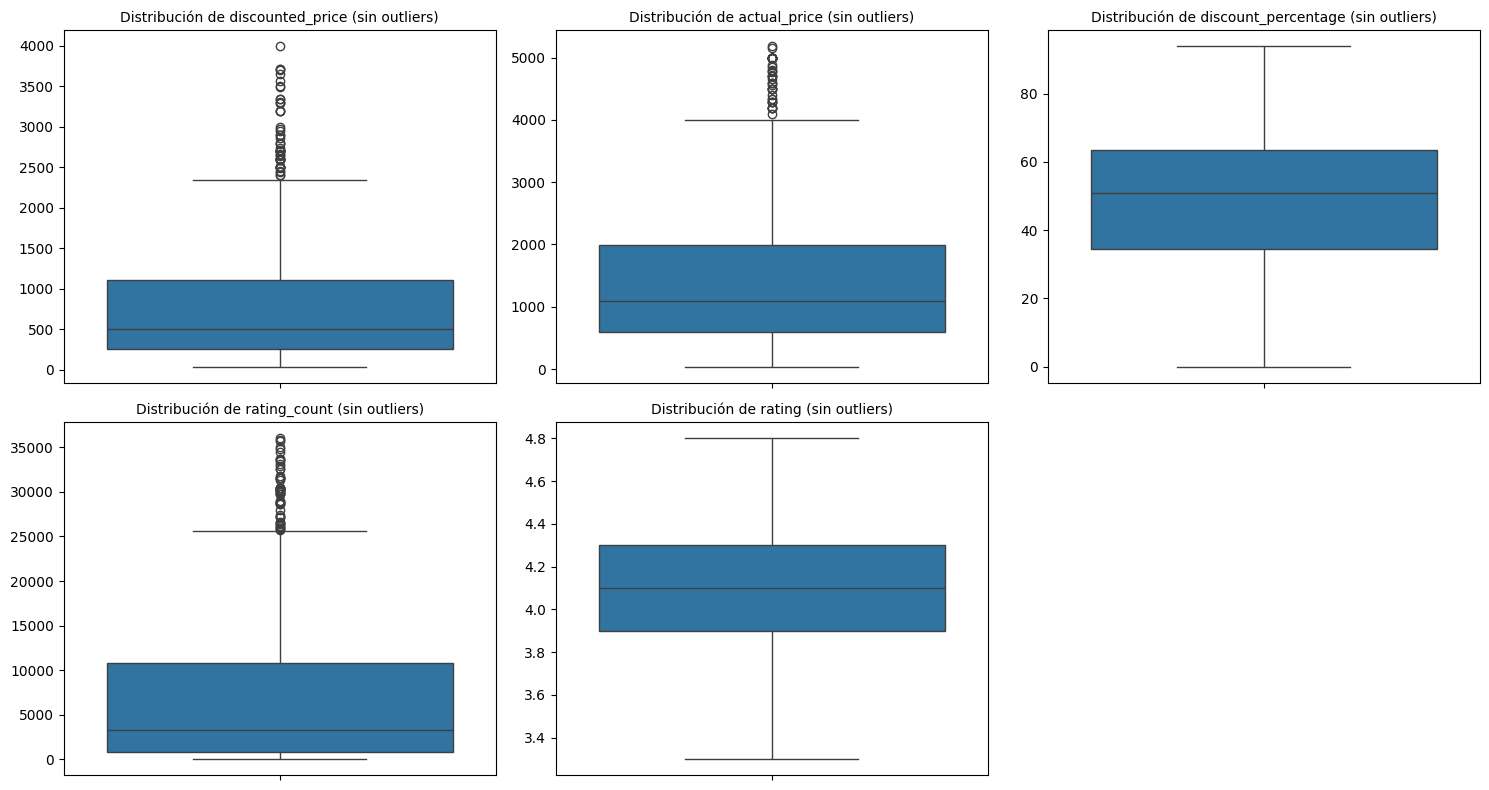

In [ ]:
# Función para eliminar outliers usando el método IQR
def remove_outliers_iqr(df, column):
    # Asegúrese de que la columna sea numérica, evitando errores
    df[column] = pd.to_numeric(df[column], errors='coerce')
    # Eliminar filas donde la conversión resultó en NaN si es necesario (según el dropna anterior)
    # df.dropna(subset=[column], inplace=True) # Esto podría ser demasiado agresivo, basándose en el dropna anterior.
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

# Aplicar la eliminación de outliers a las columnas especificadas
# Creamos una copia del DataFrame original para no modificarlo directamente en este paso si no lo deseas
df_cleaned_outliers = df.copy()

# Columnas a las que se aplicará la eliminación de outliers
columns_to_clean = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'rating']

for column in columns_to_clean:
    if column in df_cleaned_outliers.columns:
        print(f"Número de filas antes de eliminar outliers en '{column}': {len(df_cleaned_outliers)}")
        df_cleaned_outliers = remove_outliers_iqr(df_cleaned_outliers, column)
        print(f"Número de filas después de eliminar outliers en '{column}': {len(df_cleaned_outliers)}")
    else:
        print(f"La columna '{column}' no se encuentra en el DataFrame.")

# Ahora puedes trabajar con df_cleaned_outliers para tus análisis, que tendrá menos outliers
# Muestra las primeras filas del DataFrame limpio para verificar
display(df_cleaned_outliers.head())

# Opcional: Visualiza las distribuciones después de la limpieza para ver el efecto
# Seleccionar solo las columns_to_clean Que ahora son numéricas en df_cleaned_outliers
numeric_cols_cleaned = df_cleaned_outliers[columns_to_clean].select_dtypes(include=np.number).columns

if len(numeric_cols_cleaned) > 0:
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(numeric_cols_cleaned):
        plt.subplot(2, 3, i + 1)# Ajustar la cuadrícula de la subtrama según sea necesario
        sns.boxplot(y=df_cleaned_outliers[col])
        plt.title(f'Distribución de {col} (sin outliers)', fontsize=10)
        plt.ylabel("") # Retire la etiqueta y para una apariencia más limpia

    plt.tight_layout()
    plt.show()
else:
    print("\nNo numeric columns left to plot after outlier removal.")

# **COMPROBAMOS LOS TIPOS DE DATOS DE LAS COLUMNAS NUMÉRICAS A UTILIZAR:**

Lo hacemos a los fines de corroborar que no sean datos que contengan texto, fecha u otro tipo de datos diferente a los de tipo número (Float o int).

In [ ]:
#Comprobar los tipos de datos de las columnas relevantes
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'rating']].dtypes)

# Vuelva a aplicar la función de limpieza para garantizar que las columnas sean numéricas.
def clean_numeric_column(df, column, currency=False, percent=False, extract_digits=False):
    col = df[column]

    # Si ya es numérico, lo dejamos como está
    if pd.api.types.is_numeric_dtype(col):
        return col

    # Convertimos a string para limpieza
    col = col.astype(str).str.strip()

    if currency:
        col = col.str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

    if percent:
        col = col.str.replace('%', '', regex=False)

    if extract_digits:
        # Extrae solo la parte numérica (útil para rating_count con texto)
        col = col.str.extract(r'(\d[\d,]*)')[0]
        col = col.str.replace(',', '', regex=False)

    return pd.to_numeric(col, errors='coerce')

# Apply cleaning
df['discounted_price'] = clean_numeric_column(df, 'discounted_price', currency=True)
df['actual_price'] = clean_numeric_column(df, 'actual_price', currency=True)
df['discount_percentage'] = clean_numeric_column(df, 'discount_percentage', percent=True)
df['rating'] = clean_numeric_column(df, 'rating')
df['rating_count'] = clean_numeric_column(df, 'rating_count', extract_digits=True)

# Check data types again after cleaning
print("\nData types after re-cleaning:")
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'rating']].dtypes)

discounted_price       float64
actual_price           float64
discount_percentage      int64
rating_count             int64
rating                 float64
dtype: object

Data types after re-cleaning:
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating_count             int64
rating                 float64
dtype: object


# **ANÁLISIS EXPLORATORIO INICIAL**
Antes de calcular correlaciones, es importante conocer los datos: cantidad de registros, valores promedio y su distribución.

Este paso nos da un panorama general de los datos y asegura que entendemos cómo se distribuyen antes de aplicar correlaciones.

In [ ]:
# Exploración inicial
print("Cantidad de registros:", len(df))

print("\n--- Estadísticos descriptivos ---")
print(df[['discounted_price', 'rating']].describe())

print("\nModa de rating:", df['rating'].mode().values[0])
print("Moda de discounted_price:", df['discounted_price'].mode().values[0])

Cantidad de registros: 1463

--- Estadísticos descriptivos ---
       discounted_price       rating
count       1463.000000  1462.000000
mean        3129.277122     4.096717
std         6948.222850     0.289497
min           39.000000     2.000000
25%          325.000000     4.000000
50%          799.000000     4.100000
75%         1999.000000     4.300000
max        77990.000000     5.000000

Moda de rating: 4.1
Moda de discounted_price: 199.0


# **Conclusión**
El dataset contiene 1463 productos.

Las calificaciones promedio (rating) se concentran alrededor de 4 a 4.3, con baja dispersión (σ ≈ 0.29). Esto indica que la mayoría de los productos son bien valorados.

En cambio, la cantidad de calificaciones (discounted_price) presenta una variabilidad (σ ≈ 6.948), con valores que van desde 39 hasta más de 77990. Esto anticipa la presencia de outliers y confirma la necesidad de analizarlos antes de aplicar correlaciones.

# **1° REGRESIÓN LOGÍSTICA (MULTIVARIABLE)**

 La regresión logística modela la probabilidad de que un evento ocurra, por lo que necesitamos una variable dependiente que sea binaria (solo dos resultados posibles).

 Observando las columnas, variables como rating (que es numérica) o discount_percentage (también numérica) no son directamente binarias. Sin embargo, podríamos crear una variable binaria a partir de alguna de ellas para analizar.

 En este caso, y continuando con la Evidencia N° 2, seleccionamos la variable objetivo "rating".

# **A) OBJETIVO DEL ANÁLISIS:**

Queremos determinar cual es el grado de Probabilidad que tienen los productos de ser calificados con un Raiting más alto, teneindo en cuenta las mejores variables predictoras.

**is_highly_rated:** Una variable binaria (0 o 1) que indique si un producto tiene un rating por encima de un cierto umbral (por ejemplo, 4.0 o 4.5).

# **B) PLANTEO DE HIPÓTESIS:**

**Hipótesis Nula** (H₀):

La hipótesis nula establece que las variables predictoras no tienen un efecto estadísticamente significativo en el log-odds (y, por lo tanto, en la probabilidad) de que un producto sea "altamente calificado", después de controlar por las otras variables en el modelo.

Esto se expresa formalmente diciendo que los coeficientes de los predictores son iguales a cero.

**Hipótesis Alternativa** (H₁):

Establecer que al menos una o varias variables predictoras sí tienen un efecto estadísticamente significativo en el log-odds (y, por lo tanto, en la probabilidad) de que un producto sea "altamente calificado".

# **C) MODIFICACIÓN DE DATA SET:**

Se procede a generar una nueva colunma llamada **is_highly_rated**, que tiene por objetivo trasformar los datos de la columna "rating", a datos binarios, (puede tomar dos valores 0 o 1).

Definimos como "altamente calificado" a todos aquellos valores de "rating", que sean mayores a 4.0. (estos tomaran el valor de 1)

Los demás datos de "rating" calificados con menos de 4.0, tomarán el valor de cero (0)

In [ ]:
# Crear la variable binaria 'is_highly_rated'
# Definimos 'altamente calificado' como rating > 4.0
df_cleaned_outliers['is_highly_rated'] = (df_cleaned_outliers['rating'] > 4.0).astype(int)

# Mostrar las primeras filas con la nueva columna
display(df_cleaned_outliers.head())

# Verificar la distribución de la nueva variable
print("\nDistribución de la variable 'is_highly_rated':")
display(df_cleaned_outliers['is_highly_rated'].value_counts())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,is_highly_rated
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,1
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85,3.9,24871,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...,0
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65,4.1,15188,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/boAt-Micro-USB-Tangle-Fr...,1



Distribución de la variable 'is_highly_rated':


,count
is_highly_rated,
1,602
0,397


# **Resultado de análisis y agregado de nueva columna:**

La nueva columna muestra que hay 602 valores de rating que superan la calificación de 4.0.

Y que 397 valores de la misma variable, muestran valores menores a 4.0.

# **2° REGRESIÓN LOGÍSTICA: MODELADO**

# **CORRELACIÓN Y DISTRIBUCIÓN DE VARIABLES:**

# **A) MATRÍZ DE CORRELACIÓN:**

In [ ]:
# Correlación lineal entre variables numéricas
corr_matrix = df.select_dtypes(include=np.number).corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
# Eliminar valores NaN antes de apilar
corr_matrix_tidy = corr_matrix.dropna(how='all').stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,discounted_price,actual_price,0.961906,0.961906
1,discounted_price,discount_percentage,-0.241969,0.241969
2,discount_percentage,rating,-0.155679,0.155679
3,actual_price,rating,0.122467,0.122467
4,discounted_price,rating,0.121132,0.121132
5,actual_price,discount_percentage,-0.117494,0.117494
6,rating,rating_count,0.102235,0.102235
7,actual_price,rating_count,-0.036137,0.036137
8,discounted_price,rating_count,-0.027261,0.027261
9,discount_percentage,rating_count,0.011691,0.011691


## **Conclusión sobre correlaciones**

**Alta correlación positiva:**

discounted_price y actual_price → 0.96
Esto indica que el precio con descuento sigue muy de cerca al precio original, como era de esperar.

**Moderadas correlaciones negativas:**

discounted_price y discount_percentage → -0.24
Significa que productos con mayor descuento tienden a tener precios más bajos.

**Bajas correlaciones con rating:**

discount_percentage y rating → -0.16

actual_price y rating → 0.12
Estas correlaciones son débiles, indicando que ni el precio ni el descuento influyen mucho en la calificación del producto.

**Otras correlaciones pequeñas:**

Entre rating y rating_count → 0.10

Entre precios y rating_count → cercano a 0

**Interpretación general:**

La limpieza de datos eliminó filas con valores faltantes, reduciendo la cantidad de pares observados, por eso la matriz ahora es más corta.

Las relaciones más fuertes siguen siendo entre variables de precio, mientras que las variables relacionadas con ratings tienen poca correlación con los precios o descuentos.

Esto nos sugiere que para predecir rating, otras variables podrían ser más relevantes y que no necesitamos preocuparnos por multicolinealidad fuerte entre rating y las demás variables predictoras.

# **B) MAPA DE CALOR:**

En el siguiente gráfico podemos observar de forma visual, aquellas variables que presentan una colinealidad más fuerte entre sí, como así también las menos afectadas.

A priori, se tendrán en cuenta aquellas variables que presenten un valor inferior en cuanto a su colinealidad, y que podrían ser más relevantes para el objetivo de nuestro modelo.

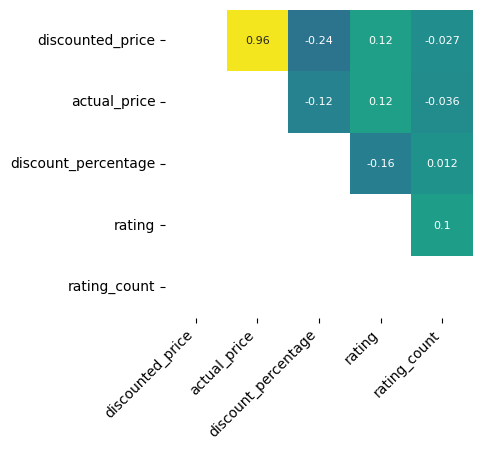

In [ ]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
    square=True,
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=10)

# **C) ESTADÍSTICOS DESCRIPTIVOS Y DISTRIBUCIÓN DE VARIABLES:**


--- Estadísticos descriptivos ---
       discounted_price   actual_price  discount_percentage       rating  \
count       1463.000000    1463.000000          1463.000000  1462.000000   
mean        3129.277122    5451.068544            47.650718     4.096717   
std         6948.222850   10881.018448            21.622373     0.289497   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1690.000000            50.000000     4.100000   
75%         1999.000000    4312.500000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  


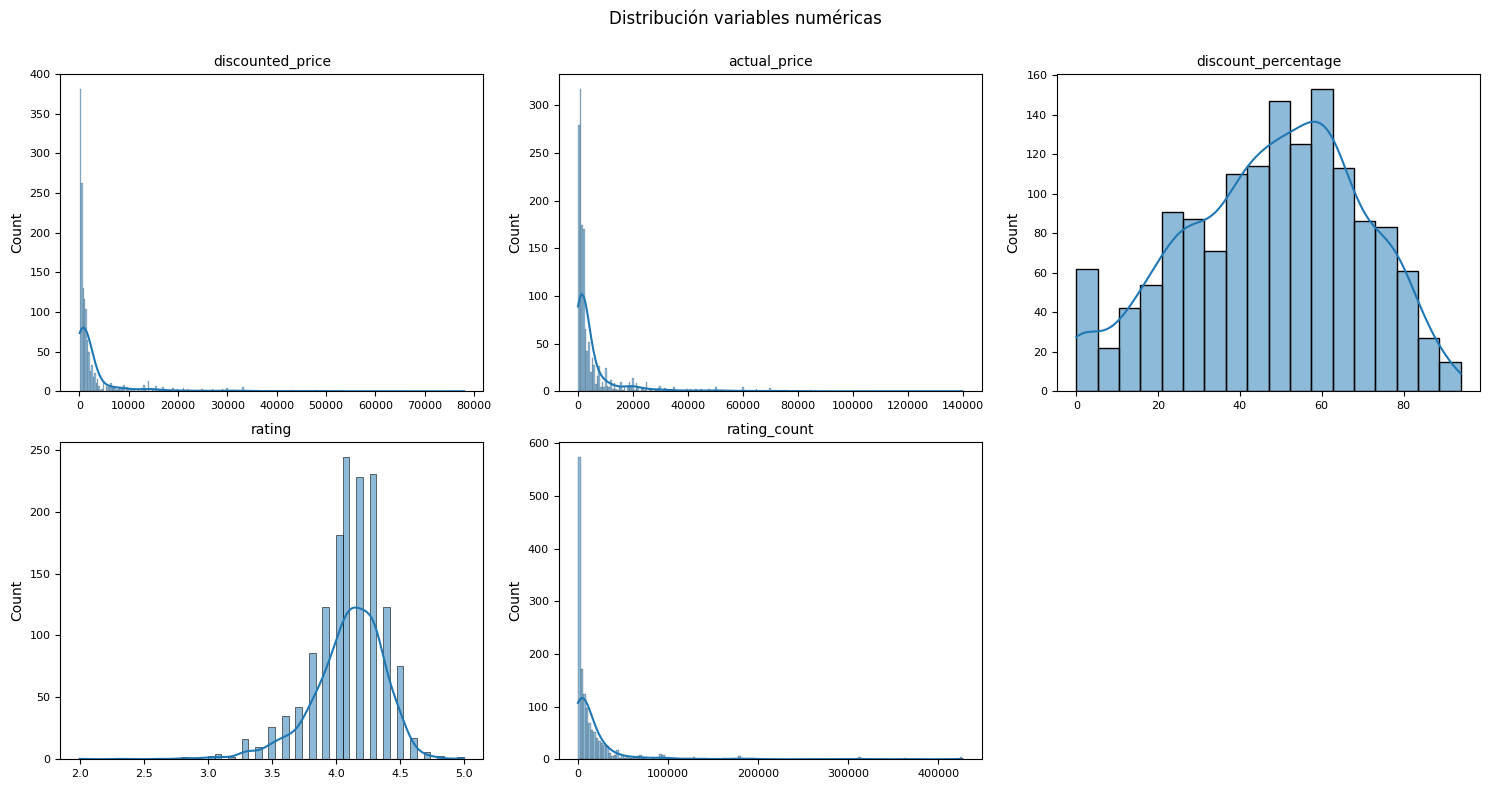

In [ ]:
# Selección de columnas numéricas
columnas_numeric = df.select_dtypes(include=np.number).columns
num_cols = len(columnas_numeric)

# Estadísticos descriptivos
print("\n--- Estadísticos descriptivos ---")
print(df[columnas_numeric].describe())

# Gráficos de distribución: ajustar cantidad de filas y columnas dinámicamente
ncols = 3
nrows = (num_cols + ncols - 1) // ncols  # ceil(num_cols / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=df,
        x=colum,
        stat="count",
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10)
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")

# Eliminar axes vacíos si sobran
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=12)
plt.show()

# **Interpretación estadísticos descriptivos y distribución de variables numéricas**

**discounted_price y actual_price:**
La media de los precios (≈ 3.129 y 5.451) es mucho menor que el valor máximo, indicando outliers extremos y sesgo positivo. La mediana menor que la media confirma que la mayoría de los productos son económicos, mientras que unos pocos productos muy caros elevan la media.
Implicación: aplicar transformación logarítmica puede reducir el impacto de estos outliers y mejorar la linealidad de la relación con el rating.

**discount_percentage:**
Distribución amplia, con mediana ≈ 50%. Permite diferenciar productos con descuentos bajos y altos, útil como predictor.

**rating:**
Promedio ≈ 4.1, desviación estándar ≈ 0.29, rango 2–5. Los ratings están concentrados en valores altos con baja variabilidad, lo que puede limitar su capacidad de diferenciación en modelos predictivos.

**rating_count:**
Amplia dispersión (2–426.973), con fuerte sesgo positivo. (Usar el logaritmo normalizaría la distribución y mejoraría la estabilidad del modelo).

**Conclusión general:**
Las variables presentan distribuciones sesgadas y presencia de outliers, especialmente precios y conteos de rating. Antes de ajustar un modelo de regresión múltiple, es recomendable:

Este bloque de análisis inicial permite identificar cuáles variables pueden ser predictoras robustas y cuáles requieren preprocesamiento antes del ajuste de regresión logística.

## **D) TRANSFORMACIÓN LOGARÍTMICA DE VARIABLES PREDICTORAS**

Para mejorar el ajuste del modelo de regresión múltiple y reducir la influencia de valores atípicos y distribuciones sesgadas, se aplicó una transformación logarítmica a las siguientes variables:

discounted_price → log_discounted_price

actual_price → log_actual_price

rating_count → log_rating_count

Otras variables como discount_percentage se mantuvieron sin transformar debido a que sus distribuciones eran relativamente más equilibradas.

In [ ]:
# 1. Limpieza de datos
# -------------------------------
# Asegurarse de que 'df' existe y contiene las columnas necesarias (suponiendo que ya se cargó antes)

# Eliminar filas donde 'rating' sea NaN (ya hecho con dropna en una celda anterior)
# df = df.dropna(subset=['rating'])

# Agregar 'rating_count_log' si no existe y eliminar 'rating_count' original
if 'rating_count' in df.columns and 'rating_count_log' not in df.columns:
     df['rating_count_log'] = np.log1p(df['rating_count'])


# 2. Transformación logarítmica
# -------------------------------
# Aplicar log(x+1) a variables con sesgo positivo
# Excluimos 'rating_count' original ya que usamos 'rating_count_log'
cols_to_log = ['discounted_price', 'actual_price']

for col in cols_to_log:
    if col in df.columns:  # Verificar que la columna original está en df
        df[f'log_{col}'] = np.log1p(df[col])
        # No eliminamos la columna original de df, aquí la manejaremos en la selección de X


# 3. Crear la variable objetivo binaria 'is_highly_rated'
# -------------------------------
# Esto se hace DESPUÉS de las transformaciones si es necesario, para que esté en el mismo DataFrame
# Definimos 'altamente calificado' como rating > 4.0
if 'rating' in df.columns and 'is_highly_rated' not in df.columns:
    df['is_highly_rated'] = (df['rating'] > 4.0).astype(int)


# 4. Selección de variables para X y y
# -------------------------------
# Incluir las columnas transformadas logarítmicamente y otras variables predictoras
selected_features = ['log_actual_price', 'discount_percentage', 'rating_count_log'] # Usamos las variables transformadas y discount_percentage

# Filtrar solo las columnas que realmente existen en el DataFrame 'df'
existing_selected_features = [col for col in selected_features if col in df.columns]

X = df[existing_selected_features].copy()
y = df['is_highly_rated']  # Variable dependiente (aseguramos que venga del mismo df)

# Asegurarnos de que las columnas originales transformadas no estén en X si su versión log está allí
cols_to_drop_from_X = ['discounted_price', 'actual_price', 'rating_count'] # Columnas originales que tienen versión log

for col in cols_to_drop_from_X:
    if col in X.columns:
        X = X.drop(columns=[col])

# **Ahora X contiene**:

*   log_discounted_price
*   log_actual_price
*   log_rating_count
*   discount_percentag


# **E) SELECCIÓN DE MEJORES PREDICTORES**

Para la selección de los mejores predictores para el modelado de datos, se procede a realizar mediante los métodos **"FORWARD" Y "BACKWARD"**, utilizamos ambos métodos, para lograr una comparativa y a partir de allí, seleccionar las variables más convenientes.

In [ ]:
# SELECCIÓN DE PREDICTORES
# ==========================================

# Dividir los datos en conjuntos de entrenamiento y prueba.

# Asegurarse de que X e Y estén definidos en los pasos anteriores.
if 'X' not in locals() or 'y' not in locals():
    print("Error: X or y not defined. Please ensure previous data preparation steps were run.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Dimensiones de los datos de entrenamiento:", X_train.shape, y_train.shape)
    print("Dimensiones de los datos de prueba:", X_test.shape, y_test.shape)

    # Agregue una constante a los datos de entrenamiento para statsmodels.
    X_train_with_const = sm.add_constant(X_train, prepend=True)

    # --- Se agregó un paso para manejar valores NaN/inf ---
    # Combine X_train_with_const y y_train para eliminar filas con NaN/inf de manera consistente.
    train_data = pd.concat([X_train_with_const, y_train], axis=1)
    train_data_cleaned = train_data.replace([np.inf, -np.inf], np.nan).dropna()

    # Separe X_train y y_train nuevamente después de limpiar.
    X_train_cleaned = train_data_cleaned.drop(columns=[y_train.name])
    y_train_cleaned = train_data_cleaned[y_train.name]

    print(f"\nDimensiones de los datos de entrenamiento después de limpiar NaN/inf: {X_train_cleaned.shape, y_train_cleaned.shape}")
    # --- Fin del paso agregado ---

#------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------

# Funciones para la selección de predictores (si no están definidas, deben agregarse aquí).

# MÉTODO FORWARD:

    def forward_selection(X, y, criterio='aic', verbose=False):
        """Selección Forward basada en AIC"""
        variables = []
        mejor_aic = float('inf')
        variables_restantes = list(X.columns)

        while len(variables_restantes) > 0:
            aics = []
            for var in variables_restantes:
                modelo_vars = variables + [var]
                try:
                    # Asegúrese de que la constante 'const' esté incluida si se agregó a X.
                    # statsmodels MCO necesita la constante si aún no está en los datos.
                    # Ahora usamos X_train_cleaned, que incluye la constante.
                    X_temp = X[modelo_vars]


                    modelo = sm.OLS(y, X_temp).fit() # Utilice OLS como criterio de selección en datos numéricos
                    aics.append((modelo.aic, var))
                except Exception as e:
                    if verbose:
                        print(f"Error fitting model with {modelo_vars}: {e}")
            if not aics:
                break
            mejor_aic_nuevo, mejor_var = min(aics)
            # Asegúrese de que la constante no se agregue dos veces en las variables seleccionadas.
            if mejor_var == 'const' and 'const' in variables:
                variables_restantes.remove(mejor_var)
                continue

            if mejor_aic_nuevo < mejor_aic:
                mejor_aic = mejor_aic_nuevo
                variables.append(mejor_var)
                variables_restantes.remove(mejor_var)
                if verbose:
                    print(f"Agregada: {mejor_var}, AIC={mejor_aic:.4f}")
            else:
                break
        return variables

# MÉTODO BACKWARD:

    def backward_selection(X, y, criterio='aic', verbose=False):
        """Selección Backward basada en AIC"""
        variables = list(X.columns)

        # statsmodels OLS necesita la constante si no está ya en los datos
        # Ahora usamos X_train_cleaned, que incluye la constante
        # si 'const' no está en las variables:
        # X = sm.add_constant(X, prepend=True) # Esto se realiza antes de llamar a la función
        # variables = list(X.columns)

        try:
            mejor_aic = sm.OLS(y, X[variables]).fit().aic # Utilice OLS como criterio de selección en datos numéricos
        except Exception as e:
             if verbose:
                  print(f"Error al ajustar el modelo inicial con todas las variables: {e}")
             return [] # Volver vacío si el modelo inicial falla.


        mejora = True

        while mejora and len(variables) > 1:
            aics = []
            # No eliminar la constante
            vars_a_considerar = [v for v in variables if v != 'const']
            if not vars_a_considerar: # Si solo permanece la constante, salir.
                break

            for var in vars_a_considerar:
                vars_sin_var = [v for v in variables if v != var]
                try:
                    modelo = sm.OLS(y, X[vars_sin_var]).fit() # Utilice OLS como criterio de selección
                    aics.append((modelo.aic, var))
                except Exception as e:
                    if verbose:
                        print(f"Modelo de ajuste de error con {vars_sin_var}: {e}")
            if not aics:
                break
            mejor_aic_nuevo, var_a_eliminar = min(aics)
            # Comparar con un modelo que no elimina ninguna variable (el modelo actual)
            if mejor_aic_nuevo < mejor_aic:
                if verbose:
                    print(f"Eliminada: {var_a_eliminar}, Nuevo AIC={mejor_aic_nuevo:.4f}")
                variables.remove(var_a_eliminar)
                mejor_aic = mejor_aic_nuevo
            else:
                mejora = False
        return variables


    # Ejecutar selección de predictor
    print("\n=== Selección Forward ===")

    # Utilice X_train_cleaned y y_train_cleaned para la selección
    predictores_forward = forward_selection(X_train_cleaned, y_train_cleaned, verbose=True)
    print("Variables seleccionadas (Forward):", predictores_forward)

    print("\n=== Selección Backward ===")
    # Utilice X_train_cleaned y y_train_cleaned para la selección
    predictores_backward = backward_selection(X_train_cleaned, y_train_cleaned, verbose=True)
    print("Variables seleccionadas (Backward):", predictores_backward)

    # AJUSTE DEL MODELO FINAL
    # ==========================================

    # Asegúrese de que "const" esté en la lista si se seleccionó.
    # Usar los datos de entrenamiento limpios para el modelo final.

    vars_finales = predictores_backward # O predictores_forward.

    # Asegúrese de que 'const' esté al principio si fue seleccionado
    if 'const' in vars_finales:
        vars_finales.remove('const')
        vars_finales.insert(0, 'const')


    X_train_final = X_train_cleaned[vars_finales]
    # Change sm.OLS to sm.Logit since we are doing logistic regression.
    # Remove the model fitting and summary from this cell.
    # modelo_final = sm.Logit(y_train_cleaned, X_train_final).fit()

    # print("\n=== Resumen del modelo final ===")
    # print(modelo_final.summary())

Dimensiones de los datos de entrenamiento: (1170, 3) (1170,)
Dimensiones de los datos de prueba: (293, 3) (293,)

Dimensiones de los datos de entrenamiento después de limpiar NaN/inf: ((1170, 4), (1170,))

=== Selección Forward ===
Agregada: rating_count_log, AIC=1585.3926
Agregada: log_actual_price, AIC=1558.5945
Agregada: discount_percentage, AIC=1551.5672
Agregada: const, AIC=1550.6418
Variables seleccionadas (Forward): ['rating_count_log', 'log_actual_price', 'discount_percentage', 'const']

=== Selección Backward ===
Variables seleccionadas (Backward): ['const', 'log_actual_price', 'discount_percentage', 'rating_count_log']


# *Resultados de la selección:*

De la aplicación de ambos métodos selectores, obtuvimos como resultado que las mejores variables predictoras para nuestro modelo son:


*   const
*   log_actual_price
*   discount_percentage
*   rating_count_log

Ambos métodos coincidieron en la selección de las variables más calificadas.



#**D) VERIFICACIÓN DE MULTICOLINEALIDAD (usando VIF)**
Calculamos el Factor de Inflación de la Varianza (VIF) para las variables independientes.

In [ ]:
# Añadir la constante a las variables independientes si aún no lo está (necesario para VIF)
# Cambie sm.OLS a sm.Logit ya que estamos haciendo regresión logística
X_cleaned = X.replace([np.inf, -np.inf], np.nan).dropna()

# Añade la constante al DataFrame limpio.
X_vif = sm.add_constant(X_cleaned)


# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                  for i in range(X_vif.shape[1])]

print("\nFactor de Inflación de la Varianza (VIF):")
display(vif_data)

# Criterio de interpretación:
# VIF = 1: No hay correlación entre la variable y las otras variables predictoras.
# 1 < VIF < 5: Correlación moderada, generalmente aceptable.
# VIF >= 5: Alta correlación, potencial problema de multicolinealidad.


Factor de Inflación de la Varianza (VIF):


,feature,VIF
0,const,54.102174
1,log_actual_price,1.007260
2,discount_percentage,1.011319
3,rating_count_log,1.018368


# **PREPARACIÓN Y CONSTRUCCIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA**

## **1º Preparación de datos para el modelo**
Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo con datos no vistos.

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)
# X y y ya deben estar preparadas en la celda anterior

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de los datos de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones de los datos de prueba:", X_test.shape, y_test.shape)

Dimensiones de los datos de entrenamiento: (1170, 3) (1170,)
Dimensiones de los datos de prueba: (293, 3) (293,)


## **2º Construcción y entrenamiento del modelo de Regresión Logística**
Usaremos `statsmodels` para construir el modelo, ya que proporciona un resumen estadístico detallado.

In [ ]:
# Añadir una constante a las variables independientes para el intercepto del modelo
X_train_sm = sm.add_constant(X_train)

# --- Se agregó un paso para gestionar valores NaN/inf ---
# Combine X_train_sm e y_train para eliminar filas con NaN/inf de forma consistente
train_data_sm = pd.concat([X_train_sm, y_train], axis=1)
train_data_sm_cleaned = train_data_sm.replace([np.inf, -np.inf], np.nan).dropna()

# Separe X_train_sm y y_train nuevamente después de limpiarlos
X_train_sm_cleaned = train_data_sm_cleaned.drop(columns=[y_train.name])
y_train_cleaned = train_data_sm_cleaned[y_train.name]
# --- Fin del paso agregado ---


# Crear y ajustar el modelo de regresión logística
# Utilizar los datos limpios para ajustar el modelo
log_reg_model = sm.Logit(y_train_cleaned, X_train_sm_cleaned).fit()

# Mostrar el resumen del modelo
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.627944
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        is_highly_rated   No. Observations:                 1170
Model:                          Logit   Df Residuals:                     1166
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Oct 2025   Pseudo R-squ.:                 0.04099
Time:                        04:03:56   Log-Likelihood:                -734.69
converged:                       True   LL-Null:                       -766.10
Covariance Type:            nonrobust   LLR p-value:                 1.479e-13
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.4997      0.466     -3.221      0.001      -2.412      -0.587
lo

## **Conclusiones del Modelo (Método MLE)**

Basado en el resumen del modelo de Regresión Logística ajustado con el método de Máxima Verosimilitud (MLE) en el conjunto de entrenamiento, podemos extraer las siguientes conclusiones:

**1. Significancia del Modelo (LLR p-value):**
* El LLR p-value es 1.479e-13, el cual es un valor extremadamente pequeño (mucho menor que el nivel de significancia común de 0.05).
* Esto indica que el modelo en su conjunto es estadísticamente significativo. Podemos rechazar la hipótesis nula de que todos los coeficientes de los predictores son cero. En otras palabras, al menos una de las variables incluidas en el modelo tiene un efecto significativo en la probabilidad de que un producto sea "altamente calificado".

**2. Pseudo R-squared:**
* El Pseudo R-squ. es 0.04099. El Pseudo R-squared en modelos logísticos es una medida de la bondad de ajuste, similar al R-squared en regresión lineal, pero no se interpreta de la misma manera.
* Un valor de 0.04099 sugiere que el modelo explica aproximadamente el 4.1% de la variabilidad en la variable dependiente (is_highly_rated). Este valor es relativamente bajo, lo que indica que las variables predictoras incluidas en este modelo solo tienen un poder explicativo modesto sobre si un producto es altamente calificado. Es posible que existan otras variables no consideradas en el dataset que influyan significativamente en la calificación.

**3. Coeficientes de los Predictores (coef y P>|z|):**
* **const (-1.4997):** El intercepto es significativo (P>|z| = 0.001 < 0.05). Representa el log-odds de un producto ser altamente calificado cuando todos los predictores son cero.
* **log_actual_price (0.1414):** El coeficiente para el logaritmo del precio actual es positivo y estadísticamente significativo (P>|z| = 0.004 < 0.05). Esto sugiere que, manteniendo otras variables constantes, un aumento en el logaritmo del precio actual está asociado con un aumento en el log-odds (y por lo tanto, en la probabilidad) de que un producto sea altamente calificado. Es decir, productos con precios (logarítmicos) ligeramente más altos tienden a tener una mayor probabilidad de ser altamente calificados.
* **discount_percentage (-0.0099):** El coeficiente para el porcentaje de descuento es negativo y estadísticamente significativo (P>|z| = 0.001 < 0.05). Esto indica que, manteniendo otras variables constantes, un aumento en el porcentaje de descuento está asociado con una disminución en el log-odds (y probabilidad) de que un producto sea altamente calificado. Esto podría implicar que los productos con descuentos más altos tienden a recibir calificaciones más bajas (posiblemente porque los clientes tienen expectativas más altas o los productos con grandes descuentos no son de la misma calidad percibida).
* **rating_count_log (0.1791):** El coeficiente para el logaritmo del conteo de calificaciones es positivo y altamente estadísticamente significativo (P>|z| = 0.000 < 0.05). Esto es consistente con la intuición: productos con un mayor número de calificaciones (logarítmico) tienen una mayor probabilidad de ser altamente calificados. Es probable que los productos más populares (con más ratings) tiendan a ser mejor percibidos en general.


**Resumen General:**

El modelo logístico indica que el logaritmo del precio actual, el porcentaje de descuento y el logaritmo del conteo de calificaciones son predictores estadísticamente significativos de la probabilidad de que un producto sea altamente calificado. Específicamente, una mayor cantidad de calificaciones y un precio (logarítmico) más alto se asocian con una mayor probabilidad de ser altamente calificado, mientras que un mayor porcentaje de descuento se asocia con una menor probabilidad. Aunque el modelo es estadísticamente significativo, su poder explicativo general (según el Pseudo R-squared) es limitado, sugiriendo que otros factores no incluidos juegan un papel importante.

# **3° PREDICCIONES DEL MODELO USANDO EL MODELO ENTRENADO:**

In [ ]:
# Predicción de probabilidades

# Usamos el modelo entrenado con statsmodels (log_reg_model) para predecir
predicciones = log_reg_model.predict(exog = X_train_sm) # Usamos X_train_sm que incluye la constante
predicciones[:4]

,0
871,0.329011
1044,0.697463
254,0.483797
1069,0.574741


# **RESULTADOS DE PREDICCIONES SOBRE EL MODELO ENTRENADO:**

Estos números representan la probabilidad estimada por el modelo, de que la variable dependiente (is_highly_rated) sea 1 (es decir, que el producto sea "altamente calificado") para cada una de esas observaciones (filas del DataFrame de entrenamiento, identificadas por sus índices 871, 1044, 254 y 1069).

Por ejemplo, para la observación con índice 871, el modelo estima una probabilidad de 0.329011 de que sea altamente calificada.
Para la observación con índice 1044, la probabilidad estimada es de 0.697463.

# **4° ACCURACY DE TEST**
Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).

In [ ]:
# Accuracy de test del modelo
# ==============================================================================

# Asegurarse de que X_test tiene la constante para la predicción con statsmodels
# Si X_test ya tiene 'const', esta línea no hará nada (idealmente) o podrías necesitar una verificación
# Sin embargo, log_reg_model espera el mismo formato que X_train_sm
# X_test = sm.add_constant(X_test, prepend=True) # Comentado porque X_test_sm ya se usa en c43b1fbd y debería ser la que se use aquí

# Asegurar de que log_reg_model esté definido en los pasos anteriores.

if 'log_reg_model' not in locals():
    print("Error: log_reg_model no está definido. Asegúrate de ejecutar la celda donde se entrena el modelo primero.")
else:

# Limpiamos X_test de posibles valores NaN o infinitos antes de agregar una constante y predecir

    if 'X_test' not in locals() or 'y_test' not in locals():
         print("Error: X_test o y_test no están definidos. Asegúrate de ejecutar la celda de división de datos primero.")
    else:
        X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()
        # Asegurar de que y_test esté alineado con el X_test limpio.
        y_test_cleaned = y_test[X_test_cleaned.index]

        # Agregar una constante a los datos de prueba limpios para la predicción con statsmodels
        X_test_sm = sm.add_constant(X_test_cleaned)


        # Predecir las probabilidades en el conjunto de prueba usando el modelo entrenado (log_reg_model)
        # Usamos X_test_sm que ya tiene la constante añadida

        predicciones_prob = log_reg_model.predict(exog = X_test_sm)

        # Convertir probabilidades a clasificaciones (0 o 1) usando un umbral de 0.5
        clasificacion = np.where(predicciones_prob < 0.5, 0, 1)

        # Calcular el accuracy
        accuracy = accuracy_score(
                    y_true    = y_test_cleaned, # Use cleaned y_test
                    y_pred    = clasificacion,
                    normalize = True
                   )
        print("")
        print(f"El accuracy de test es: {100*accuracy:.2f}%")


El accuracy de test es: 64.85%


## **Conclusión sobre el Accuracy de Test**

**Resultado Obtenido:**

El accuracy de test calculado es: **64.85%**

**¿Qué significa esto?**

*   El accuracy representa la proporción de predicciones correctas que hizo el modelo en el conjunto de datos de prueba (X_test).
*   Un accuracy del 64.85% significa que, de todas las observaciones en el conjunto de prueba, el modelo clasificó correctamente si un producto era "altamente calificado" (is_highly_rated = 1) o no (is_highly_rated = 0) en aproximadamente el 64.85% de los casos.

**Interpretación en relación con el modelo desarrollado:**

1.  **Rendimiento por encima del azar:** Si tuviéramos que adivinar al azar si un producto es altamente calificado o no (en un dataset balanceado con 50% de cada clase), esperaríamos un accuracy del 50%. Nuestro modelo, con un 64.85%, se desempeña mejor que una simple suposición al azar. Esto indica que las variables predictoras (log_actual_price, discount_percentage,rating_count_log) sí aportan información útil para la clasificación.

2.  **Poder predictivo moderado:** Un accuracy del 64.85% sugiere un poder predictivo moderado para el modelo. No es un accuracy extremadamente alto (que podría indicar sobreajuste o una relación muy fuerte y simple), ni es muy bajo (que indicaría que el modelo no está aprendiendo bien de los datos).

3.  **Consistencia con otras métricas:** Este resultado de accuracy es consistente con el Pseudo R-squared de 0.04099 obtenido en el resumen del modelo. Un Pseudo R-squared bajo sugiere que las variables incluidas explican solo una pequeña parte de la variabilidad en la variable objetivo, lo cual se refleja en un accuracy que es mejor que el azar pero no cercano al 100%. El AUC de 0.66 también respalda esta interpretación de un modelo con capacidad predictiva moderada, ya que un AUC de 0.5 es aleatorio y 1.0 es perfecto.

**Consideraciones:**

*   El accuracy es una métrica útil, pero no siempre cuenta toda la historia, especialmente en datasets desbalanceados (donde una clase es mucho más frecuente que la otra). En tu caso, la distribución de is_highly_rated (602 vs 397 en el DataFrame limpio) no está perfectamente balanceada, pero tampoco es extremadamente desbalanceada.


En conclusión, el accuracy del 64.85% en el conjunto de prueba indica que tu modelo de regresión logística tiene una capacidad predictiva razonable para determinar si un producto será altamente calificado basándose en el logaritmo del precio actual, el porcentaje de descuento y el logaritmo del conteo de calificaciones, aunque no es un predictor perfecto.

# **5° EVALUACÍON DEL MODELO: MÉTRICAS ADICIONALES:**

Además del Accuracy, calculamos otras métricas como Precisión, Recall (Sensibilidad), F1-Score y el AUC. Para obtener una visión más completa del rendimiento del modelo de clasificación.

In [ ]:
# Asegurarse de que log_reg_model esté definido en los pasos anteriores

if 'log_reg_model' not in locals():
    print("Error: log_reg_model no definido. Asegúrese de que la celda de ajuste del modelo se haya ejecutado correctamente.")
else:
    # Limpie X_test de posibles valores NaN o infinitos antes de agregar una constante y predecir
    if 'X_test' not in locals() or 'y_test' not in locals():
         print("Error: X_test o y_test no están definidos. Asegúrese de ejecutar la celda de división de datos primero.")
    else:
        X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()

        # Asegúrese de que y_test esté alineado con el X_test limpio
        y_test_cleaned = y_test[X_test_cleaned.index]

        # Agregar una constante a los datos de prueba limpios para la predicción con statsmodels
        X_test_sm = sm.add_constant(X_test_cleaned)

        # Predecir las probabilidades en el conjunto de prueba
        y_pred_prob = log_reg_model.predict(X_test_sm)

        # Convertir probabilidades a clasificaciones (0 o 1) usando un umbral de 0.5
        clasificacion = np.where(y_pred_prob < 0.5, 0, 1)

        # Calcular Precision
        precision = precision_score(y_test_cleaned, clasificacion)

        # Calcular Recall (Sensibilidad)
        recall = recall_score(y_test_cleaned, clasificacion)

        # Calcular F1-Score
        f1 = f1_score(y_test_cleaned, clasificacion)

        # Calcular Confusion Matrix
        conf_matrix = confusion_matrix(y_test_cleaned, clasificacion)


        print("\nMétricas de Evaluación Adicionales:")
        print(f"Precision: {precision:.2f}")
        print(f"Recall (Sensibilidad): {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print("\nMatriz de Confusión:")
        print(conf_matrix)


Métricas de Evaluación Adicionales:
Precision: 0.66
Recall (Sensibilidad): 0.91
F1-Score: 0.76

Matriz de Confusión:
[[ 25  86]
 [ 17 165]]


## **Informe y Conclusión sobre las Métricas de Evaluación Adicionales**

Basado en los resultados obtenidos de las métricas adicionales (Precisión, Recall, F1-Score) y la Matriz de Confusión, podemos interpretar el rendimiento del modelo de la siguiente manera:

**Métricas Obtenidas:**

*   **Precisión:** 0.66
*   **Recall (Sensibilidad):** 0.91
*   **F1-Score:** 0.76

## **Interpretación de las Métricas Adicionales**

**Basado en la Matriz de Confusión**:
[[ 25  86]
 [ 17 165]]

*   **Verdaderos Negativos (True Negatives - TN):** El número en la esquina superior izquierda (25). Son los casos en los que el modelo predijo correctamente que un producto no era altamente calificado (predicción = 0) y, de hecho, no lo era (realidad = 0).
*   **Falsos Positivos (False Positives - FP):** El número en la esquina superior derecha (86). Son los casos en los que el modelo predijo incorrectamente que un producto era altamente calificado (predicción = 1) cuando en realidad no lo era (realidad = 0). Esto es un "error de Tipo I".
*   **Falsos Negativos (False Negatives - FN):** El número en la esquina inferior izquierda (17). Son los casos en los que el modelo predijo incorrectamente que un producto no era altamente calificado (predicción = 0) cuando en realidad sí lo era (realidad = 1). Esto es un "error de Tipo II".
*   **Verdaderos Positivos (True Positives - TP):** El número en la esquina inferior derecha (165). Son los casos en los que el modelo predijo correctamente que un producto era altamente calificado (predicción = 1) y, de hecho, sí lo era (realidad = 1).

**Interpretación de las Métricas:**

*   **Precisión (0.66):** Se calcula como TP / (TP + FP). En nuestro caso, es 165 / (165 + 86) ≈ 0.66. Esto significa que de todos los productos que el modelo predijo como altamente calificados, aproximadamente el 66% realmente lo son.
*   **Recall (0.91):** Se calcula como TP / (TP + FN). En nuestro caso, es 165 / (165 + 17) ≈ 0.91. Esto significa que tu modelo fue capaz de identificar correctamente aproximadamente el 91% de todos los productos que realmente eran altamente calificados. Tu modelo es bastante bueno encontrando la mayoría de los productos altamente calificados.
*   **F1-Score (0.76):** Es un promedio ponderado (armónico) entre Precisión y Recall. Un valor de 0.76 indica un buen equilibrio entre la capacidad del modelo para no generar falsos positivos (Precisión) y su capacidad para encontrar la mayoría de los positivos reales (Recall).

# 6° **EVALUACIÓN DEL MODELO: CURVA ROC (GRÁFICO)**
Calculamos la curva ROC para visualizar el rendimiento del modelo en la clasificación.

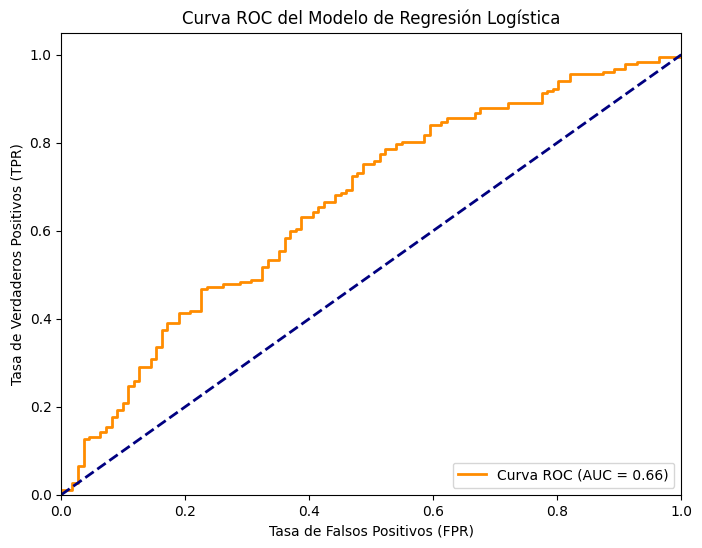


Área Bajo la Curva ROC (AUC): 0.66


In [ ]:
#Asegúrese de que log_reg_model esté definido en los pasos anteriores
if 'log_reg_model' not in locals():
    print("Error: log_reg_model no definido. Asegúrese de que la celda de ajuste del modelo se haya ejecutado correctamente.")
else:
    # Limpie X_test de posibles valores NaN o infinitos antes de agregar una constante y predecir
    X_test_cleaned = X_test.replace([np.inf, -np.inf], np.nan).dropna()
    # Asegúrese de que y_test esté alineado con el X_test limpio
    y_test_cleaned = y_test[X_test_cleaned.index]

    # Agregue una constante a los datos de prueba limpios para la predicción con statsmodels
    X_test_sm = sm.add_constant(X_test_cleaned)

    # Predecir las probabilidades en el conjunto de prueba
    y_pred_prob = log_reg_model.predict(X_test_sm)

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test_cleaned, y_pred_prob) # Use cleaned y_test

    # Calcular el Área Bajo la Curva ROC (AUC)
    roc_auc = roc_auc_score(y_test_cleaned, y_pred_prob) # Use cleaned y_test

    # Plotear la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC del Modelo de Regresión Logística')
    plt.legend(loc="lower right")
    plt.show()

    print(f"\nÁrea Bajo la Curva ROC (AUC): {roc_auc:.2f}")

## **Informe sobre la Curva ROC y el Área Bajo la Curva (AUC)**

**Resultados Obtenidos:**

*   La curva ROC mostrada se eleva por encima de la línea diagonal, lo que indica que nuestro modelo tiene **poder predictivo**.
*   El Área Bajo la Curva (AUC) calculado es: **0.66**

**Conclusiones de la Curva ROC y el AUC:**

1.  **Poder Discriminatorio Moderado:** Un AUC de 0.66 sugiere que nuestro modelo tiene un **poder discriminatorio moderado**. Esto significa que el modelo es capaz de distinguir entre productos "altamente calificados" y "no altamente calificados" mejor que el azar (0.5), pero no es un clasificador excelente (que tendría un AUC más cercano a 1.0). En aproximadamente el 66% de las veces, el modelo clasificará correctamente un par aleatorio de productos de diferentes clases.

2.  **Consistencia con Otras Métricas:** Este resultado de AUC es consistente con el Pseudo R-squared bajo (0.04099) y el accuracy de test moderado (64.85%) que observaste anteriormente. Todas estas métricas apuntan a un modelo que es estadísticamente significativo y tiene alguna capacidad predictiva, pero que no explica una gran proporción de la variabilidad en la variable objetivo. Es probable que otros factores no incluidos en el modelo también influyan en si un producto recibe una alta calificación.

3.  **Utilidad Práctica:** Aunque el AUC de 0.66 no es muy alto, el modelo aún puede ser útil en escenarios donde incluso una mejora moderada sobre el azar es valiosa. Por ejemplo, podría usarse para priorizar productos para revisión o promoción.

En resumen, la curva ROC y el AUC confirman que las variables predictoras seleccionadas aportan valor al modelo y le permiten clasificar mejor que si se basara puramente en el azar. Sin embargo, el valor de AUC de 0.66 indica que hay espacio para mejorar la capacidad predictiva, posiblemente explorando otras variables o técnicas de modelado.

# **MODELO DE REGRESIÓN LOGÍSTICA CON SOLUCIONADOR L-BFGS (sklearn)**
Generamos un nuevo modelo de regresión logística utilizando la biblioteca `sklearn` y especificando el solucionador L-BFGS.

In [ ]:
# Asegurarnos de usar los mismos datos de entrenamiento y prueba que en el modelo anterior
# (asumiendo que X_train, X_test, y_train, y_test ya fueron definidos)

# --- Added step to handle NaN/inf values in training data for sklearn ---
# Combine X_train and y_train to drop rows with NaN/inf consistently
train_data_sklearn = pd.concat([X_train, y_train], axis=1)
train_data_sklearn_cleaned = train_data_sklearn.replace([np.inf, -np.inf], np.nan).dropna()

# Separate X_train and y_train again after cleaning
X_train_cleaned_sklearn = train_data_sklearn_cleaned.drop(columns=[y_train.name])
y_train_cleaned_sklearn = train_data_sklearn_cleaned[y_train.name]
# --- End of added step ---


# Inicializar y entrenar el modelo de Regresión Logística con solucionador L-BFGS
# max_iter aumentado para asegurar convergencia en algunos casos
log_reg_model_lbfgs = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# Use the cleaned training data for fitting the sklearn model
log_reg_model_lbfgs.fit(X_train_cleaned_sklearn, y_train_cleaned_sklearn)

print("Modelo de Regresión Logística entrenado con L-BFGS.")

Modelo de Regresión Logística entrenado con L-BFGS.


## **Resumen del Modelo con L-BFGS**
Mostramos los coeficientes e intercepto del modelo entrenado con L-BFGS. Para una evaluación más completa, se pueden calcular métricas como precisión, recall, F1-score y el AUC.

In [ ]:
# Mostrar coeficientes e intercepto
print("\nCoeficientes del modelo (L-BFGS):", log_reg_model_lbfgs.coef_)
print("Intercepto del modelo (L-BFGS):", log_reg_model_lbfgs.intercept_)

# Nota: sklearn no proporciona un resumen tan detallado como statsmodels por defecto.
# Para una evaluación completa, se deben calcular métricas de rendimiento por separado.

# Opcional: Calcular el AUC para este modelo
from sklearn.metrics import roc_auc_score

# Ensure log_reg_model_lbfgs is defined from previous steps
if 'log_reg_model_lbfgs' not in locals():
    print("Error: log_reg_model_lbfgs no está definido. Asegúrate de ejecutar la celda donde se entrena el modelo sklearn primero.")
else:
    # Clean X_test from potential NaN or infinite values before aligning columns and predicting
    if 'X_test' not in locals() or 'y_test' not in locals():
         print("Error: X_test o y_test no están definidos. Asegúrate de ejecutar la celda de división de datos primero.")
    else:
        X_test_cleaned_sklearn = X_test.replace([np.inf, -np.inf], np.nan).dropna()
        # Ensure y_test is aligned with the cleaned X_test
        y_test_cleaned_sklearn = y_test[X_test_cleaned_sklearn.index]


        # Asegurarnos de que las columnas de X_test coinciden con las columnas de X_train (usadas para entrenar el modelo sklearn)
        # Esto previene el ValueError si X_test ha sido modificado para incluir 'const' u otras columnas inesperadas
        # Use the cleaned X_test for column alignment
        X_test_aligned = X_test_cleaned_sklearn[X_train_cleaned_sklearn.columns] # Use X_train_cleaned_sklearn for column reference


        y_pred_prob_lbfgs = log_reg_model_lbfgs.predict_proba(X_test_aligned)[:, 1]
        roc_auc_lbfgs = roc_auc_score(y_test_cleaned_sklearn, y_pred_prob_lbfgs) # Use cleaned y_test

        print(f"\nÁrea Bajo la Curva ROC (AUC) para el modelo L-BFGS: {roc_auc_lbfgs:.2f}")


Coeficientes del modelo (L-BFGS): [[ 0.14109021 -0.00992928  0.17894843]]
Intercepto del modelo (L-BFGS): [-1.49599865]

Área Bajo la Curva ROC (AUC) para el modelo L-BFGS: 0.66


## **Evaluación del Modelo L-BFGS: Curva ROC**
Generamos la curva ROC para visualizar el rendimiento del modelo de regresión logística entrenado con el solucionador L-BFGS.

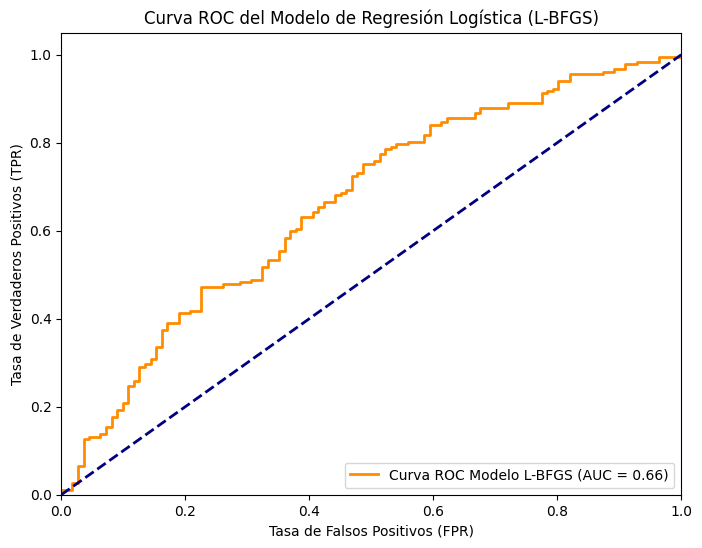


Área Bajo la Curva ROC (AUC) para el modelo L-BFGS: 0.66


In [ ]:
# Predecir las probabilidades en el conjunto de prueba usando el modelo L-BFGS
# predict_proba devuelve las probabilidades para ambas clases [prob_clase_0, prob_clase_1]
# Usamos X_test (sin la constante añadida manualmente) porque el modelo sklearn fue entrenado sin ella

# Ensure log_reg_model_lbfgs is defined from previous steps
if 'log_reg_model_lbfgs' not in locals():
    print("Error: log_reg_model_lbfgs no está definido. Asegúrate de ejecutar la celda donde se entrena el modelo sklearn primero.")
else:
    # Clean X_test from potential NaN or infinite values before aligning columns and predicting
    if 'X_test' not in locals() or 'y_test' not in locals():
         print("Error: X_test o y_test no están definidos. Asegúrate de ejecutar la celda de división de datos primero.")
    else:
        X_test_cleaned_sklearn = X_test.replace([np.inf, -np.inf], np.nan).dropna()
        # Ensure y_test is aligned with the cleaned X_test
        y_test_cleaned_sklearn = y_test[X_test_cleaned_sklearn.index]


        # Asegurarnos de que las columnas de X_test coinciden con las columnas de X_train (usadas para entrenar el modelo sklearn)
        # Esto previene el ValueError si X_test ha sido modificado para incluir 'const' u otras columnas inesperadas
        # Use the cleaned X_test for column alignment
        if 'X_train_cleaned_sklearn' in locals(): # Check if X_train_cleaned_sklearn exists (from cell 0332404e)
             X_test_aligned = X_test_cleaned_sklearn[X_train_cleaned_sklearn.columns] # Use X_train_cleaned_sklearn for column reference
        else:
             # Fallback in case X_train_cleaned_sklearn is not defined (less ideal)
             print("Warning: X_train_cleaned_sklearn not found, aligning columns based on X_test.")
             X_test_aligned = X_test_cleaned_sklearn[X_test_cleaned_sklearn.columns]


        y_pred_prob_lbfgs = log_reg_model_lbfgs.predict_proba(X_test_aligned)[:, 1]

        # Calcular la curva ROC para el modelo L-BFGS
        fpr_lbfgs, tpr_lbfgs, thresholds_lbfgs = roc_curve(y_test_cleaned_sklearn, y_pred_prob_lbfgs) # Use cleaned y_test

        # Calcular el Área Bajo la Curva ROC (AUC) para el modelo L-BFGS (aunque ya lo mostramos antes, lo calculamos de nuevo para el gráfico)
        roc_auc_lbfgs = roc_auc_score(y_test_cleaned_sklearn, y_pred_prob_lbfgs) # Use cleaned y_test

        # Plotear la curva ROC del modelo L-BFGS
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_lbfgs, tpr_lbfgs, color='darkorange', lw=2, label='Curva ROC Modelo L-BFGS (AUC = %0.2f)' % roc_auc_lbfgs)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos (FPR)')
        plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
        plt.title('Curva ROC del Modelo de Regresión Logística (L-BFGS)')
        plt.legend(loc="lower right")
        plt.show()

        print(f"\nÁrea Bajo la Curva ROC (AUC) para el modelo L-BFGS: {roc_auc_lbfgs:.2f}")

# **Conclusión Final sobre los Resultados del Modelo de Regresión Logística**

El análisis de regresión logística tuvo como objetivo determinar la probabilidad de que un producto sea "altamente calificado" (is_highly_rated), definido como tener un rating superior a 4.0, basándose en las variables predictoras transformadas: el logaritmo del precio actual (log_actual_price), el porcentaje de descuento (discount_percentage) y el logaritmo del conteo de calificaciones (rating_count_log).

Los resultados obtenidos del modelo ajustado (utilizando el método MLE de statsmodels y confirmado por el modelo L-BFGS de sklearn) llevan a las siguientes conclusiones principales:

1.  **Significancia Estadística del Modelo:** El modelo en su conjunto es estadísticamente significativo (confirmado por el bajo LLR p-value). Esto significa que las variables predictoras incluidas, en conjunto, tienen una relación real y no aleatoria con la probabilidad de que un producto sea altamente calificado.

2.  **Identificación de Predictores Significativos:** Las tres variables predictoras incluidas (log_actual_price, discount_percentage, y rating_count_log) resultaron ser estadísticamente significativas (con p-valores < 0.05). Esto valida la selección de estas variables como relevantes para nuestro objetivo.

3.  **Dirección e Impacto de los Predictores:**
    *   Un **mayor logaritmo del precio actual** (log_actual_price) se asocia con una **mayor probabilidad** de ser altamente calificado. Esto podría indicar que los productos percibidos como de mayor valor o calidad (reflejado en un precio más alto) tienden a recibir mejores calificaciones.
    *   Un **mayor porcentaje de descuento** (discount_percentage) se asocia con una **menor probabilidad** de ser altamente calificado. Esto es un hallazgo interesante que podría sugerir que los productos con grandes descuentos a veces no cumplen con las expectativas del cliente o son percibidos como de menor calidad.
    *   Un **mayor logaritmo del conteo de calificaciones** (rating_count_log) se asocia con una **mayor probabilidad** de ser altamente calificado. Esto es intuitivo; los productos más populares y con más opiniones tienden a tener calificaciones promedio más altas, probablemente debido a un efecto de "prueba social" o simplemente porque los productos de buena calidad acumulan más reseñas positivas.

4.  **Poder Explicativo y Predictivo:**
    *   El Pseudo R-squared de aproximadamente 0.04 sugiere que el modelo explica una **porción modesta** de la variabilidad en la variable dependiente. Esto indica que si bien las variables incluidas son significativas, hay otros factores no considerados en este análisis que probablemente influyen en gran medida en si un producto es altamente calificado.
    *   El Accuracy de test de **64.85%** y el Área Bajo la Curva ROC (AUC) de **0.66** confirman un **poder predictivo moderado**. El modelo es mejor que el azar para clasificar productos (AUC > 0.5 y Accuracy > 50%), pero no es un clasificador de alto rendimiento (AUC y Accuracy lejos de 1.0 o 100%).

5.  **Ausencia de Multicolinealidad Severa:** El análisis de VIF mostró valores bajos para las variables predictoras (excluyendo la constante), lo que indica que no hay problemas significativos de multicolinealidad entre log_actual_price, discount_percentage, y rating_count_log, lo que valida la estabilidad de los coeficientes del modelo.

**En resumen:** El modelo de regresión logística desarrollado identifica que el precio (logarítmico), el porcentaje de descuento y la cantidad de calificaciones (logarítmica) son factores significativos que influyen en la probabilidad de que un producto sea altamente calificado. Si bien el modelo es estadísticamente válido y superior a una clasificación aleatoria, su capacidad predictiva es moderada. Esto sugiere la oportunidad de explorar variables adicionales o técnicas de modelado más avanzadas para mejorar la precisión de la predicción de productos altamente calificados en el futuro.